# **TATAMOTORS Stock Price Prediction using LSTM**

**INTRODUCTION**

Stock price forecasting is a popular and important topic in the field of Finance because of its volatility. It
attracts researchers to capture the unpredictability and predict its next moves. Stock brokers and market
analysts continuously study the pattern of stocks to plan their buy or sell strategies. Internal to TataMotors, it
is important for them to know what triggers the stock price and what downfalls it. This influence various
business decisions taken in TataMotors. Stock market produces huge amount of data every day, so it's not an
easy task to predict the future stock price considering all the current and past information. 

There are two
main approaches to predict the stock prices,
> Technical analysis

> Fundamental analysis

Technical analysis used the past prices and volume to predict the future trend 

whereas
Fundamental analysis uses other financial and economic factors which influence the stock prices.


**Problem Statement**

This project mainly aims to improve the predictive accuracy of TataMotors stock prices and determine if Time
series forecasting and LSTM models can be used to offer insights regarding the future stock prices On a broad perspective, we target
to build models to predict the rise and fall of the stock price pattern and forecast the day-to-day stock
price of TataMotors that would help the company for a better planning.

**Data**

Dataset is taken from Yahoo Finance (yfinance).

Yahoo! Finance is a media property that is part of the Yahoo! network. It provides financial news, data and commentary including stock quotes, press releases, financial reports, and original content. 

At Yahoo Finance, you get free stock quotes, up-to-date news, portfolio management resources, international market data, social interaction 

 > https://finance.yahoo.com

**Tata Motors Lts - LARGE CAP**


Tata Motors Limited is an automobile company engaged in manufacture of motor vehicles

Market Capital: 1,59,244 Cr

Last Month Return: 13.09%

Yeaarly Returns: -11.70%

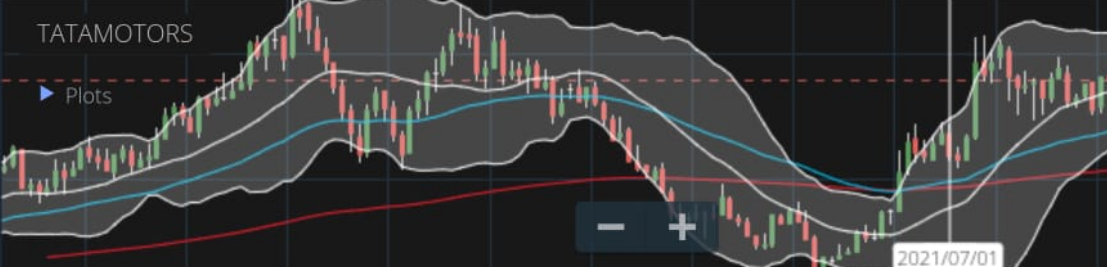

TataMotors Stock Price Chart (Zerotha)

-> white line - 20 days moving average

-> blue line - 50 days moving average

-> red line - 200 days moving average

Techinical Indicators : these are tech used by traders who follow techinical ananysis. most common indicatores are 

> RSI Divergences

> RSI

> MACD

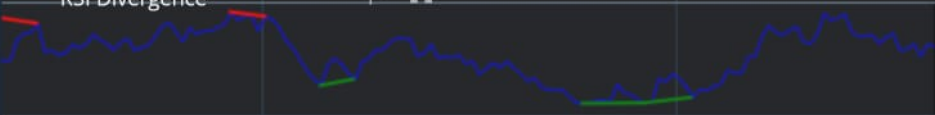

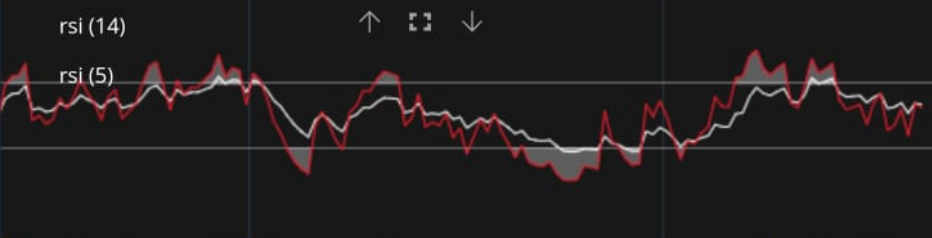

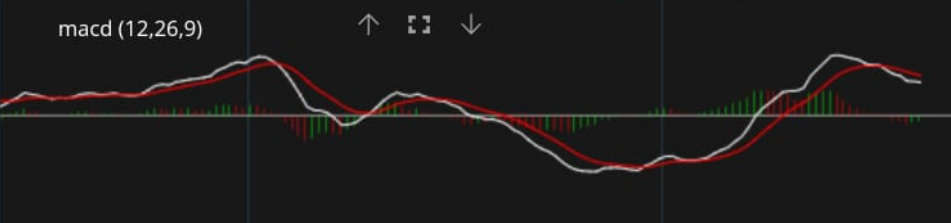

**Methodology**

In this project i use Lstm to forecaste the price of the stock. Here ther are two approach,

> Univariate LSTM Model

> Multivariate LSTM MODEL

## **Univariate LSTM Model**



1.   we will collect the stock data -- TATA
2.   Preprocessing Train - Test
3.   Create Stacked LSTM model
4.   Predict the test Data and plot the output
5.   predict the future 30 days and plot the output





In [ ]:
 #! pip install tensorflow --upgrade 

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("/content/TATAMOTORS_24.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02 00:00:00+05:30,179.029724,183.086212,176.902542,181.997894,176.739136,10175802
1,2012-01-03 00:00:00+05:30,184.273483,192.732742,184.224014,191.891769,186.347137,15868503
2,2012-01-04 00:00:00+05:30,191.792831,200.351028,190.951843,199.064835,193.312943,22752471
3,2012-01-05 00:00:00+05:30,198.817490,203.566544,198.075439,199.955276,194.177658,21640778
4,2012-01-06 00:00:00+05:30,197.877563,202.824509,196.393478,201.439362,195.618866,13553191


In [ ]:
#df = yf.download('TATAMOTORS.NS',start  = '2012-01-01', end = date.today())
#df.head()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02 00:00:00+05:30,179.029724,183.086212,176.902542,181.997894,176.739136,10175802
1,2012-01-03 00:00:00+05:30,184.273483,192.732742,184.224014,191.891769,186.347137,15868503
2,2012-01-04 00:00:00+05:30,191.792831,200.351028,190.951843,199.064835,193.312943,22752471
3,2012-01-05 00:00:00+05:30,198.817490,203.566544,198.075439,199.955276,194.177658,21640778
4,2012-01-06 00:00:00+05:30,197.877563,202.824509,196.393478,201.439362,195.618866,13553191


In [ ]:
df1 = df.reset_index()['Close']

In [ ]:
df1

0       181.997894
1       191.891769
2       199.064835
3       199.955276
4       201.439362
           ...    
2725    408.399994
2726    400.750000
2727    403.149994
2728    408.399994
2729    422.149994
Name: Close, Length: 2730, dtype: float64

In [ ]:
df1.shape

(2730,)

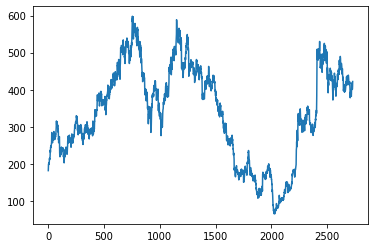

In [ ]:
df1.plot()

In [ ]:
# lstm are sensitive to the scale of the data. so we apply minmax scaler

In [ ]:
df1.shape

(2730,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(2730, 1)

In [ ]:
df1

array([[0.21901343],
       [0.23758182],
       [0.25104391],
       ...,
       [0.6340619 ],
       [0.64391487],
       [0.66972026]])

In [ ]:
#splitting dataset into train and test
training_size = int(len(df1)* 0.65)
testing_size = len(df1)- training_size
train_data,test_data = df1[0:training_size,:],df1[training_size: len(df1),:1]

In [ ]:
training_size

1774

In [ ]:
testing_size

956

In [ ]:
# Rough
#len(train_data)-100-1

1673

In [ ]:
#train_data[0:100,0]

In [ ]:
#train_data[0 + 100, 0]
# Rough ends

0.3894712847297246

In [ ]:
import numpy
# conver an array of values into dataset matrix 
def create_dataset(dataset, time_step = 1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i + time_step), 0]    # i =0 0,1,2,3
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshaping into X=t ,t+1, t+2, t+3 and Y= t+4
time_step = 100
x_train,y_train = create_dataset(train_data, time_step)
x_test,y_test = create_dataset(test_data, time_step)

In [ ]:
x_train

array([[0.21901343, 0.23758182, 0.25104391, ..., 0.3732239 , 0.37703045,
        0.39104959],
       [0.23758182, 0.25104391, 0.25271505, ..., 0.37703045, 0.39104959,
        0.38947128],
       [0.25104391, 0.25271505, 0.25550032, ..., 0.39104959, 0.38947128,
        0.32875264],
       ...,
       [0.22230171, 0.22342777, 0.22624291, ..., 0.23177933, 0.23271771,
        0.21751598],
       [0.22342777, 0.22624291, 0.21517003, ..., 0.23271771, 0.21751598,
        0.21873588],
       [0.22624291, 0.21517003, 0.20531706, ..., 0.21751598, 0.21873588,
        0.22427231]])

In [ ]:
x_train.shape, y_train.shape

((1673, 100), (1673,))

In [ ]:
x_test.shape, y_test.shape

((855, 100), (855,))

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train.shape, y_train.shape

((1673, 100, 1), (1673,))

In [ ]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_12 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,validation_data =(x_test,y_test),epochs=20,batch_size=64,verbose= 1)

Epoch 1/20
27/27 [==============================] - 23s 444ms/step - loss: 0.0564 - val_loss: 0.0095
Epoch 2/20
27/27 [==============================] - 9s 341ms/step - loss: 0.0058 - val_loss: 0.0041
Epoch 3/20
27/27 [==============================] - 9s 326ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 4/20
27/27 [==============================] - 10s 370ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 5/20
27/27 [==============================] - 8s 282ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 6/20
27/27 [==============================] - 10s 383ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 7/20
27/27 [==============================] - 8s 279ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 8/20
27/27 [==============================] - 11s 417ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 9/20
27/27 [==============================] - 9s 320ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 10/20
27/27 [==============================] - 9s 329ms/step - loss: 0.0021 - val_loss: 0.

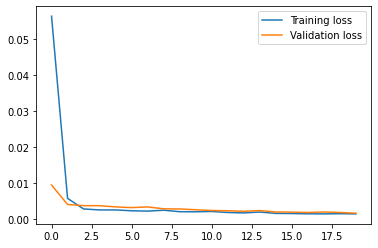

In [ ]:
plt.plot(history.history['loss'],label= 'Training loss')
plt.plot(history.history['val_loss'],label= 'Validation loss')
plt.legend();

In [ ]:
import tensorflow as tf

In [ ]:
 #! pip install tensorflow --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [ ]:
#!pip3 install --upgrade tensorflow==<version>

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
## prediction and performance metrices
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

27/27 [==============================] - 1s 53ms/step


In [ ]:
# transforming to orginal form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
## calculate RMSE Performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

387.35341726462013

In [ ]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

317.81707525206855

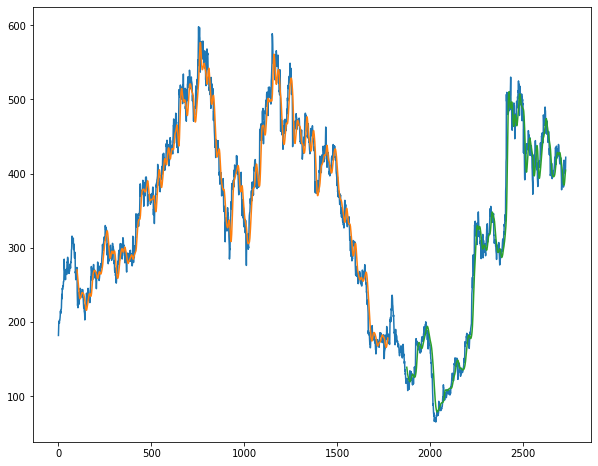

In [ ]:
#plotting
# shift train prediction for plotting
plt.figure(figsize=(10,8))
look_back = 100
trainpredictplot = np.empty_like(df1)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction for plotting
testpredictplot = np.empty_like(df1)
testpredictplot[:, :] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and prediction
plt.plot( scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)

In [ ]:
# prediction 90 future days
len(test_data)

956

In [ ]:
test_data.shape

(956, 1)

In [ ]:
x_input = test_data[856:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 90 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.64448726]
101
1 day input [0.73887872 0.73653278 0.71419939 0.70734925 0.71429321 0.72386467
 0.73474983 0.72236329 0.71682684 0.68914469 0.67591359 0.69242902
 0.68004242 0.68858169 0.6715032  0.62345824 0.625898   0.62646106
 0.63237283 0.63678322 0.62373975 0.64297649 0.6546124  0.6509527
 0.6205493  0.61566972 0.6216753  0.62627338 0.6211123  0.6208308
 0.63612634 0.62636719 0.62458431 0.62449044 0.63115295 0.63668935
 0.64260117 0.64673    0.65207877 0.66821888 0.66972026 0.65864741
 0.6757259  0.69383658 0.69036457 0.65104658 0.67225389 0.69139682
 0.6978716  0.68736175 0.67159702 0.6728169  0.66774969 0.67450602
 0.67328609 0.67206621 0.69045845 0.69055226 0.69036457 0.7020943
 0.69993604 0.69458727 0.68210686 0.67901022 0.66587293 0.66043035
 0.65311096 0.65470621 0.66287011 0.66174405 0.65949198 0.66868807
 0.66193174 0.64785607 0.63302971 0.61773416 0.58751838 0.59962342
 0.6171711  0.61182234 0.60168787 0.60553525 0.61839098 0.61670191
 0.60112486 0.60356462 0.59436853 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,191)

In [ ]:
len(df1)

2730

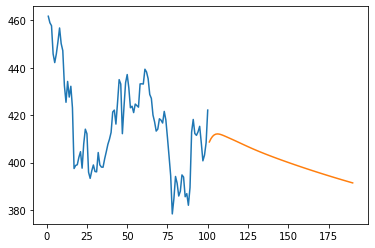

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2630:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

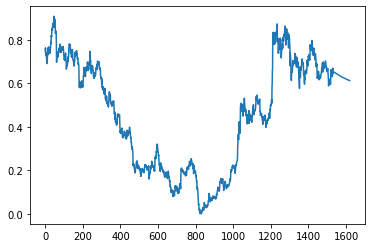

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

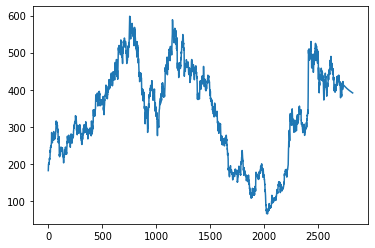

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

##**Multivariate LSTM MODEL**

In [ ]:
#!pip install yfinance

In [ ]:
 #! pip install tensorflow --upgrade 

In [ ]:
# Load Pakage
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('max_rows',500)
pd.set_option('max_columns',500)
pd.set_option('display.width',50)

# Load Pakages for Model
import itertools
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

sns.set_style('ticks')
sns.set(font_scale=1.5)

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf
from datetime import date

In [ ]:
date.today()

datetime.date(2023, 1, 25)

In [ ]:
data = yf.download('TATAMOTORS.NS',start  = '2012-01-01', end = date.today())
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02 00:00:00+05:30,179.029724,183.086212,176.902542,181.997894,176.739136,10175802
2012-01-03 00:00:00+05:30,184.273483,192.732742,184.224014,191.891769,186.347137,15868503
2012-01-04 00:00:00+05:30,191.792831,200.351028,190.951843,199.064835,193.312943,22752471
2012-01-05 00:00:00+05:30,198.817490,203.566544,198.075439,199.955276,194.177658,21640778
2012-01-06 00:00:00+05:30,197.877563,202.824509,196.393478,201.439362,195.618866,13553191


In [ ]:
data.to_csv('TATAMOTORS_24.csv')

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-18 00:00:00+05:30,415.899994,415.950012,407.450012,408.399994,408.399994,13310316
2023-01-19 00:00:00+05:30,406.500000,407.799988,400.100006,400.750000,400.750000,13126520
2023-01-20 00:00:00+05:30,404.000000,412.500000,401.200012,403.149994,403.149994,23906114
2023-01-23 00:00:00+05:30,407.000000,410.950012,405.000000,408.399994,408.399994,13113183
2023-01-24 00:00:00+05:30,410.000000,424.000000,410.000000,422.149994,422.149994,30197475


In [ ]:
data.shape

(2730, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2730 entries, 2012-01-02 00:00:00+05:30 to 2023-01-24 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2730 non-null   float64
 1   High       2730 non-null   float64
 2   Low        2730 non-null   float64
 3   Close      2730 non-null   float64
 4   Adj Close  2730 non-null   float64
 5   Volume     2730 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 149.3 KB


In [ ]:
# checking data type of date for plotting purpose 
(data.index).dtype

datetime64[ns, Asia/Kolkata]

In [ ]:
data.shape

(2730, 6)

In [ ]:
#data = dataset[:round(dataset.shape[0] * 0.9)]
#validate = dataset[round(dataset.shape[0] * 0.9):]

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02 00:00:00+05:30,179.029724,183.086212,176.902542,181.997894,176.739136,10175802
2012-01-03 00:00:00+05:30,184.273483,192.732742,184.224014,191.891769,186.347137,15868503
2012-01-04 00:00:00+05:30,191.792831,200.351028,190.951843,199.064835,193.312943,22752471
2012-01-05 00:00:00+05:30,198.817490,203.566544,198.075439,199.955276,194.177658,21640778
2012-01-06 00:00:00+05:30,197.877563,202.824509,196.393478,201.439362,195.618866,13553191


In [ ]:
print(f'-> No. of Rows: {data.shape[0]} \n-> No. of Columns: {data.shape[1]}')

-> No. of Rows: 2730 
-> No. of Columns: 6


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2730.0,3.387488e+02,1.264004e+02,66.500000,2.535125e+02,3.458000e+02,4.385625e+02,6.002121e+02
High,2730.0,3.435751e+02,1.274506e+02,66.900002,2.580868e+02,3.527000e+02,4.438295e+02,6.059011e+02
Low,2730.0,3.333212e+02,1.250051e+02,63.500000,2.492334e+02,3.402500e+02,4.320000e+02,5.898730e+02
Close,2730.0,3.382152e+02,1.261530e+02,65.300003,2.524938e+02,3.454724e+02,4.371000e+02,5.981344e+02
Adj Close,2730.0,3.373712e+02,1.264488e+02,65.300003,2.505333e+02,3.448302e+02,4.370500e+02,5.978923e+02
Volume,2730.0,2.130506e+07,2.903331e+07,0.000000,6.438654e+06,1.050557e+07,2.240367e+07,3.905778e+08


In [ ]:
# check unique values
for i in data.columns:
  print('*************************************',i,'*************************************')
  print(data[i].unique())
  print()

************************************* Open *************************************
[179.02972412 184.27348328 191.79283142 ... 415.75       420.29998779
 413.        ]

************************************* High *************************************
[183.08621216 192.73274231 200.35102844 ... 407.79998779 412.5
 410.95001221]

************************************* Low *************************************
[176.90254211 184.22401428 190.95184326 ... 412.5        400.1000061
 401.20001221]

************************************* Close *************************************
[181.99789429 191.89176941 199.06483459 ... 408.3999939  400.75
 403.1499939 ]

************************************* Adj Close *************************************
[176.73913574 186.34713745 193.3129425  ... 408.3999939  400.75
 403.1499939 ]

************************************* Volume *************************************
[10175802 15868503 22752471 ... 23906114 13113183 30197475]



In [ ]:
# Checking for unique values in every column
data.nunique()

Open         2200
High         2403
Low          2387
Close        2459
Adj Close    2524
Volume       2729
dtype: int64

In [ ]:
# checking Duplicated values
data.duplicated().sum()

0

In [ ]:
# Check the Nullvalues
df = data.copy()
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
Before = data.shape
null_values = df.isnull().sum().sum()
df = df.dropna()
after_shape = df.shape
print(f'Orginal Shape: {Before} \nNo. of Null Values: {null_values}\nAfter Droping Null Values: {after_shape}')

Orginal Shape: (2730, 6) 
No. of Null Values: 0
After Droping Null Values: (2730, 6)


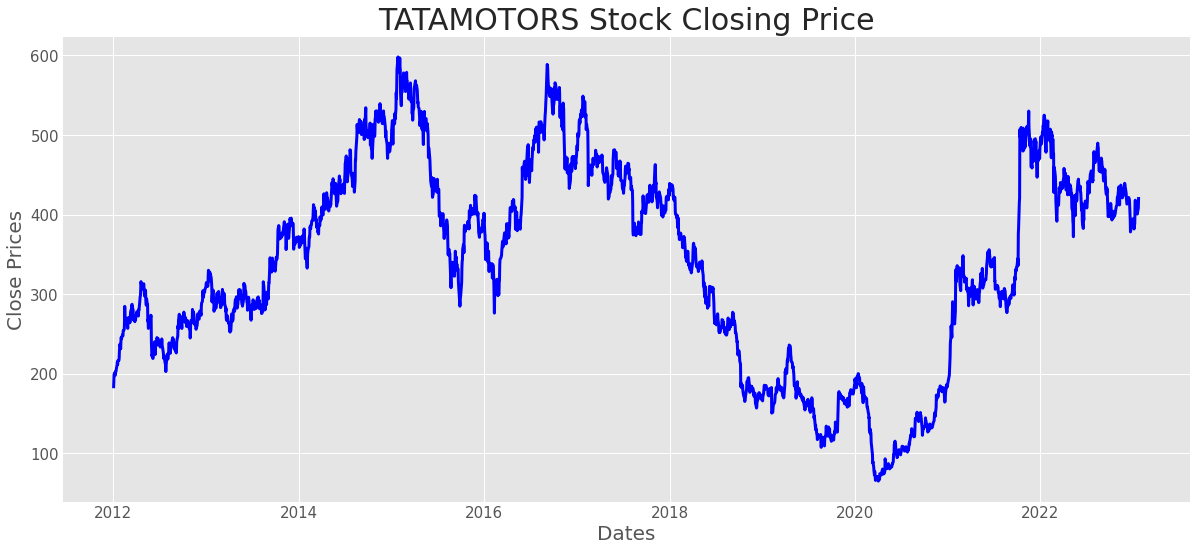

In [ ]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(df['Close'], linewidth = 3, color = 'blue')
plt.title('TATAMOTORS Stock Closing Price', fontsize = 30)
plt.show()

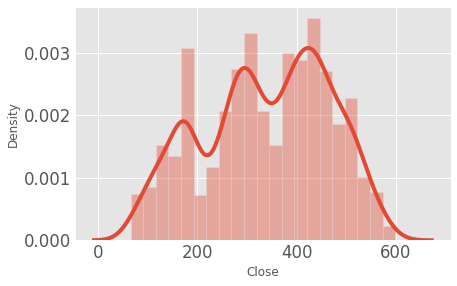

In [ ]:
sns.distplot(df['Close'])

In [ ]:
pd.options.plotting.backend = 'matplotlib'

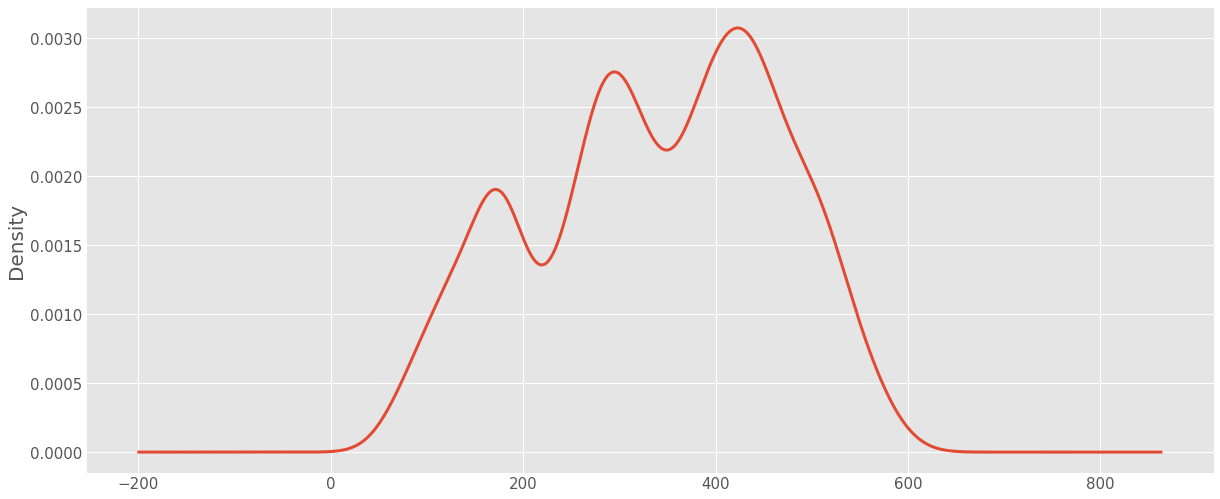

In [ ]:
# Distribution of the close price  
df_close = df['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [ ]:
# check stationality

In [ ]:
np.mean(df['Close'].head(12))

201.30332056681314

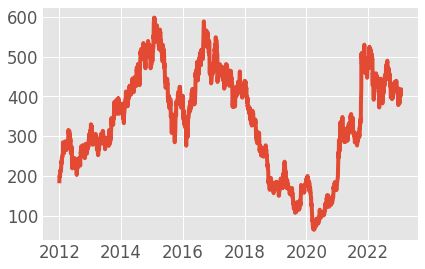

In [ ]:
plt.plot(df['Close'])

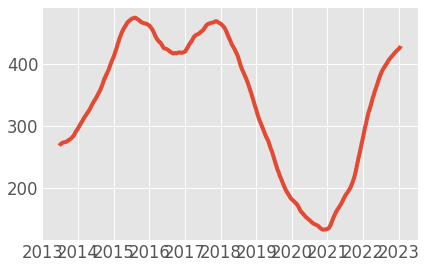

In [ ]:
plt.plot(df['Close'].rolling(365).mean())

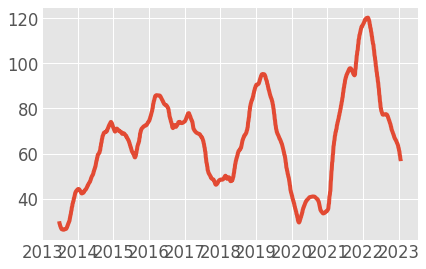

In [ ]:
plt.plot(df['Close'].rolling(365).std() )

In [ ]:
adfuller(df['Close'],autolag='AIC')

(-1.8797926002177663,
 0.34162619829329444,
 0,
 2729,
 {'1%': -3.4327484835605944,
  '5%': -2.862599676387103,
  '10%': -2.567334100151985},
 19123.398785723577)

In [ ]:
rolmeannn = df['Close'].rolling(12).mean() # rolling mean
rolstdnn = df['Close'].rolling(12).std() # rolling standard deviation

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

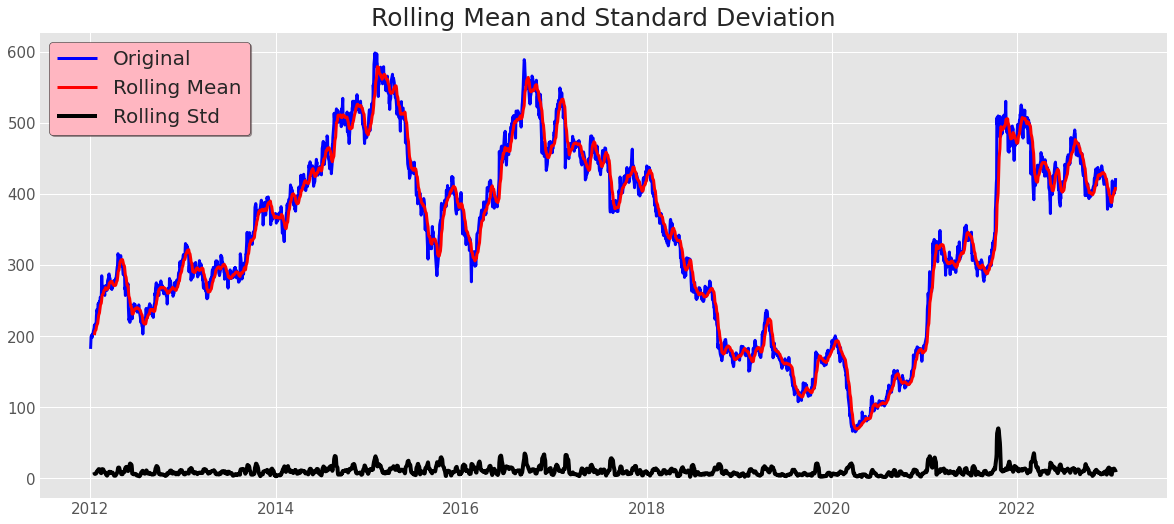

Results of dickey fuller test
Test Statistics                  -1.879793
p-value                           0.341626
No. of lags used                  0.000000
Number of observations used    2729.000000
critical value (1%)              -3.432748
critical value (5%)              -2.862600
critical value (10%)             -2.567334
dtype: float64


In [ ]:
test_stationarity(df['Close'])

In [ ]:
# We can't reject the Null hypothesis because the p-value is bigger than 0.05. 
# Furthermore, the test statistics exceed the critical values. As a result, the data is not stationary.

In [ ]:
df_close=df['Close']

In [ ]:
df_close.diff()

Date
2012-01-02 00:00:00+05:30          NaN
2012-01-03 00:00:00+05:30     9.893875
2012-01-04 00:00:00+05:30     7.173065
2012-01-05 00:00:00+05:30     0.890442
2012-01-06 00:00:00+05:30     1.484085
                               ...    
2023-01-18 00:00:00+05:30    -6.899994
2023-01-19 00:00:00+05:30    -7.649994
2023-01-20 00:00:00+05:30     2.399994
2023-01-23 00:00:00+05:30     5.250000
2023-01-24 00:00:00+05:30    13.750000
Name: Close, Length: 2730, dtype: float64

In [ ]:
# Get the difference of each Adj Close point
tsla_close_diff_1 = df_close.diff()

In [ ]:
tsla_close_diff_1.dropna(inplace=True)

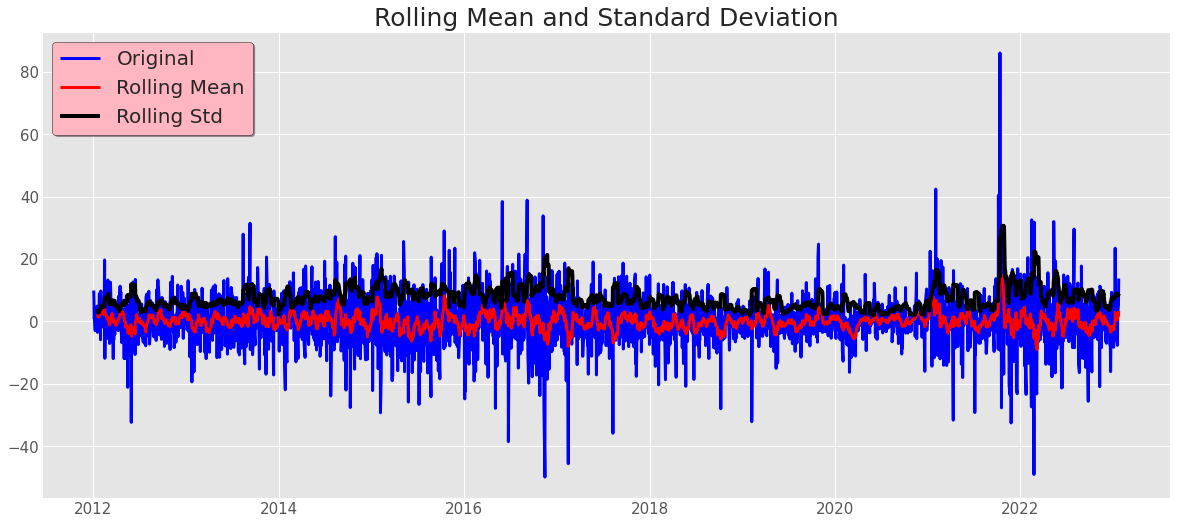

Results of dickey fuller test
Test Statistics                 -51.822883
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    2728.000000
critical value (1%)              -3.432749
critical value (5%)              -2.862600
critical value (10%)             -2.567334
dtype: float64


In [ ]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(tsla_close_diff_1)

Decompose the time series :

In [ ]:
result=seasonal_decompose(df["Close"],model= 'additive',period=30)

<Figure size 1440x720 with 0 Axes>

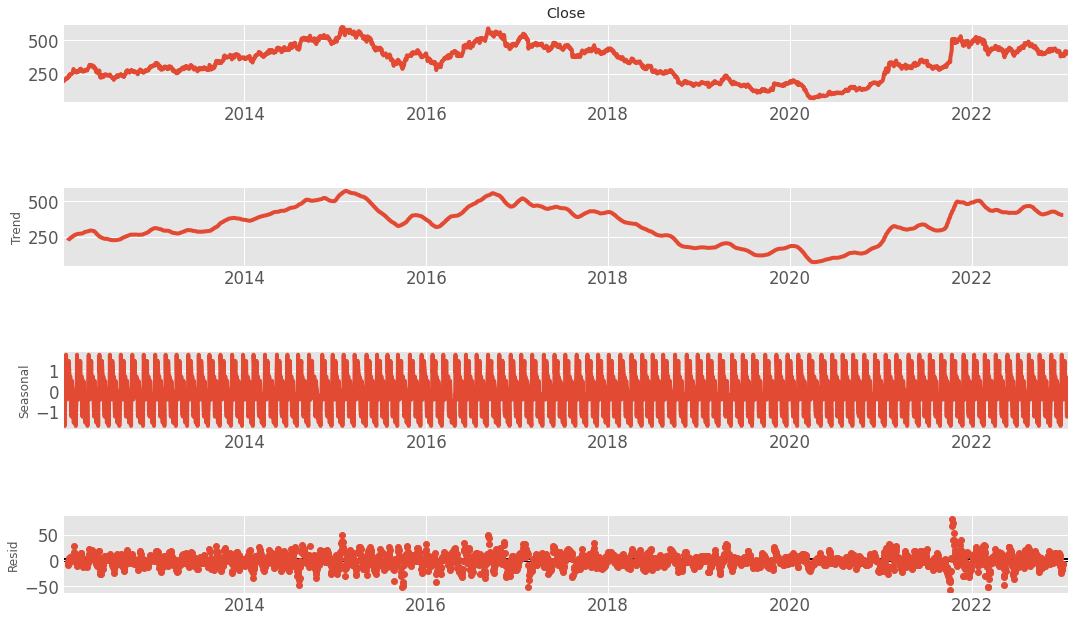

In [ ]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Figure size 1440x720 with 0 Axes>

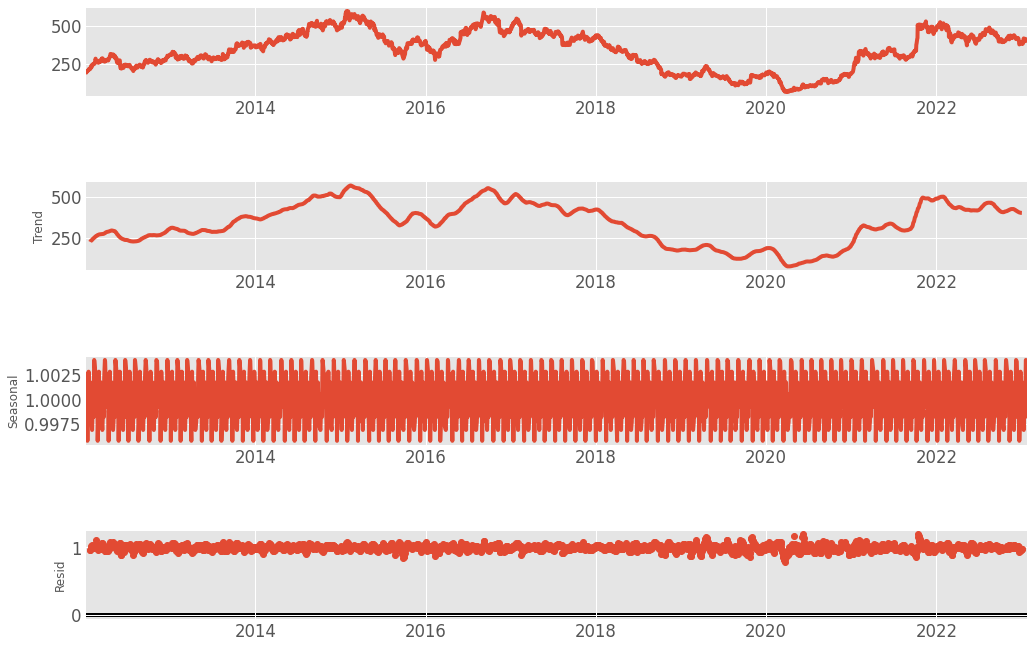

In [ ]:
result=seasonal_decompose(df[["Close"]],model="multiplicative",period=30)
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [ ]:
# extracting columns we need 
cols = list(df)[0:5]
cols

['Open', 'High', 'Low', 'Close', 'Adj Close']

In [ ]:
# converting into float so we wont lose any info while doing normailzation
df_train = df[cols].astype(float)
df_train.shape

(2730, 5)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2730 entries, 2012-01-02 00:00:00+05:30 to 2023-01-24 00:00:00+05:30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2730 non-null   float64
 1   High       2730 non-null   float64
 2   Low        2730 non-null   float64
 3   Close      2730 non-null   float64
 4   Adj Close  2730 non-null   float64
dtypes: float64(5)
memory usage: 128.0 KB


In [ ]:
# scaling
scaler = StandardScaler()
scaler = scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)

In [ ]:
# converting the input as req for LSTM
x_train = [] # training series
y_train = [] # pred series
n_future = 1 # No of days we want to predict into the future
n_past = 14  # no. of past days we want to use to predict the future
len(df_train_scaled)

2730

In [ ]:
# converting into array and to create timestep
for i in range(n_past, len(df_train_scaled) - n_future + 1):
  x_train.append(df_train_scaled[i - n_past: i, 0:df_train.shape[1]])
  y_train.append(df_train_scaled[i + n_future - 1:i + n_future, 0])
x_train, y_train = np.array(x_train),np.array(y_train)  

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2716, 14, 5)
(2716, 1)


In [ ]:
# Define Autoencoder model

model = Sequential()
model.add(LSTM(64, activation= 'relu', input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True)) # returns seq
model.add(LSTM(32, activation= 'relu', return_sequences=False)) # returns vector
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss = 'mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 14, 64)            17920     
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,epochs=10,batch_size=16,validation_split=0.1,verbose=1)

Epoch 1/10
153/153 [==============================] - 8s 22ms/step - loss: 0.0823 - val_loss: 0.0228
Epoch 2/10
153/153 [==============================] - 3s 18ms/step - loss: 0.0393 - val_loss: 0.0125
Epoch 3/10
153/153 [==============================] - 3s 18ms/step - loss: 0.0338 - val_loss: 0.0091
Epoch 4/10
153/153 [==============================] - 3s 18ms/step - loss: 0.0307 - val_loss: 0.0148
Epoch 5/10
153/153 [==============================] - 3s 18ms/step - loss: 0.0310 - val_loss: 0.0117
Epoch 6/10
153/153 [==============================] - 3s 19ms/step - loss: 0.0306 - val_loss: 0.0079
Epoch 7/10
153/153 [==============================] - 3s 21ms/step - loss: 0.0280 - val_loss: 0.0055
Epoch 8/10
153/153 [==============================] - 3s 20ms/step - loss: 0.0284 - val_loss: 0.0061
Epoch 9/10
153/153 [==============================] - 3s 19ms/step - loss: 0.0272 - val_loss: 0.0042
Epoch 10/10
153/153 [==============================] - 3s 18ms/step - loss: 0.0270 - val_lo

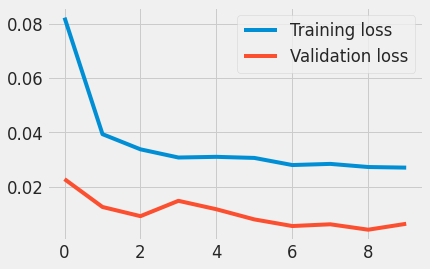

In [ ]:
plt.plot(history.history['loss'],label= 'Training loss')
plt.plot(history.history['val_loss'],label= 'Validation loss')
plt.legend();

In [ ]:
n_days_for_future = 90
forecast_periods_dates = pd.date_range(list(df.index)[-1],periods = n_days_for_future,freq = '1d').tolist()
print(forecast_periods_dates)

[Timestamp('2023-01-24 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-01-25 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-01-26 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-01-27 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-01-28 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-01-29 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-01-30 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-01-31 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-02-01 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-02-02 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-02-03 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-02-04 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-02-05 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-02-06 00:00:00+0530', tz='Asia/Kolkata', freq='D'), Timestamp('2023-02-07 00:00:00+0530', tz='Asia/

In [ ]:
forecast = model.predict(x_train[-n_days_for_future:])

3/3 [==============================] - 0s 10ms/step


In [ ]:
# invers transform 
forecast_copies = np.repeat(forecast,df_train.shape[-1],axis = -1) # as we took 5 col as ip making a copy and showing onlu one op
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0] # the one variable is repeated 5 times 

In [ ]:
y_pred_future # orginal predicted value by reversing the scaler

array([445.13315, 437.49808, 428.4592 , 427.8232 , 425.90836, 424.97702,
       422.829  , 410.30548, 400.60913, 396.0185 , 397.45142, 397.6236 ,
       396.96814, 399.68057, 404.42194, 406.98386, 401.33945, 395.25574,
       391.9598 , 391.94473, 393.17075, 392.24615, 395.1276 , 396.37628,
       395.08005, 394.28687, 395.97253, 398.33755, 400.87234, 402.9577 ,
       405.9903 , 410.00876, 414.0658 , 414.1516 , 415.7839 , 421.38498,
       426.01364, 418.2222 , 416.15366, 419.98846, 425.53802, 427.44806,
       423.0557 , 420.2574 , 418.47058, 418.14224, 419.00082, 418.7164 ,
       421.70975, 425.8257 , 427.52988, 430.3262 , 432.6733 , 432.40204,
       428.8738 , 424.94247, 420.30524, 415.75714, 411.9461 , 409.44223,
       411.44812, 413.12048, 413.6865 , 414.93204, 415.04123, 411.7173 ,
       406.1367 , 398.25653, 386.35043, 380.2964 , 382.74887, 385.34085,
       384.4005 , 384.57364, 387.01508, 389.16388, 387.39026, 384.74817,
       381.52795, 381.841  , 391.1472 , 401.25586, 

In [ ]:
# convert timestamp to date

forecast_dates = []
for time_i in forecast_periods_dates:
  forecast_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame({'Date': np.array(forecast_dates),'Open': y_pred_future})
df_forecast['Date']= pd.to_datetime(df_forecast['Date'])

In [ ]:
df_forecast.head()

,Date,Open
0,2023-01-24,445.133148
1,2023-01-25,437.498077
2,2023-01-26,428.459198
3,2023-01-27,427.823212
4,2023-01-28,425.908356


In [ ]:
df_forecast.tail()

,Date,Open
85,2023-04-19,409.351746
86,2023-04-20,407.719757
87,2023-04-21,402.522034
88,2023-04-22,400.055908
89,2023-04-23,400.769684


In [ ]:
df_copy = df.copy()
df_copy = df_copy.reset_index()

In [ ]:
orginal = pd.DataFrame()
orginal['Date'] = df.index
orginal['Open'] = df_copy.Open
orginal['Date']= pd.to_datetime(orginal['Date'])
orginal = orginal.loc[orginal['Date'] >='2020-12-01']

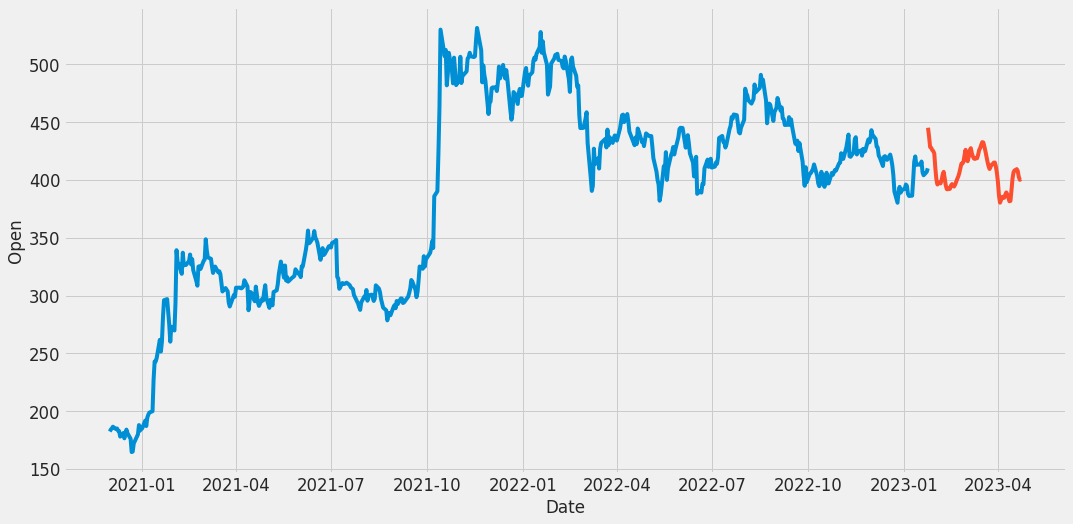

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(orginal['Date'],orginal['Open'])
sns.lineplot(df_forecast['Date'],df_forecast['Open'])

In [ ]:
df_forecast.to_csv('TATAMOTORS - Price Forecast.csv')

In [ ]:
# Visualization of Forecasting

In [ ]:
import plotly.express as px
fig = px.line(orginal, x='Date',y="Open")
# showing the plot
fig.show()

In [ ]:
fig = px.line(df_forecast, x='Date',y="Open")
# showing the plot
fig.show()

In [ ]:
#pd.options.plotting.backend = "plotly"
# df.plot(data,x=data.index, y=['Open', 'High'])